In [294]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [295]:
testImg = cv2.imread('Data/GradientTest.jpg')
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
img = cv2.imread('Data/Shark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [296]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])


def show_colors(colors):
    for c in range (0, len(colors)):
        sample = np.zeros((1, 1, 3), np.uint8)
        sample[:] = colors[c]
        plt.rcParams['figure.figsize'] = [len(colors), len(colors)]
        plt.subplot(1,len(colors),c+1), plt.imshow(sample)
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)        

In [297]:
#Quantizing
def quantize(source, col):
    img = source.astype(np.single)
    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)
    
    # Apply quantization
    for r in range(rows):
        for c in range(cols):
            pixel = img[r, c]
            idx = np.argmin(np.linalg.norm(col - pixel, ord=2, axis=1.))
            new_pixel = col[idx]       
            quantized[r, c, :] = new_pixel/255
            
    return quantized

In [298]:
#Floyd-Steinberg Dithering
def fs_dithering(source, col):
    img_tmp = np.copy(source).astype(np.single);
    dithering = np.zeros_like(img_tmp)
    
    rows, cols, channels = source.shape
    for r in range(1, rows-1):
        for c in range(1, cols-1):
            pixel = img_tmp[r, c];
            idx = np.argmin(np.linalg.norm(col - pixel, ord=2, axis=1.))
            new_pixel = col[idx]        

            # Compute quantization error
            err = pixel - new_pixel;
          
            # Diffuse the quantization error accroding to the FS diffusion matrix
            img_tmp[r  , c+1] += err * 7/16;
            img_tmp[r+1, c-1] += err * 3/16;
            img_tmp[r+1, c  ] += err * 5/16;
            img_tmp[r+1, c+1] += err * 1/16;
            
            dithering[r, c, :] = new_pixel/255
    return dithering

<h1>Testing on 16x16 diagonal gradient:</h1>

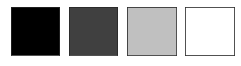

In [299]:
show_colors(colors)

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

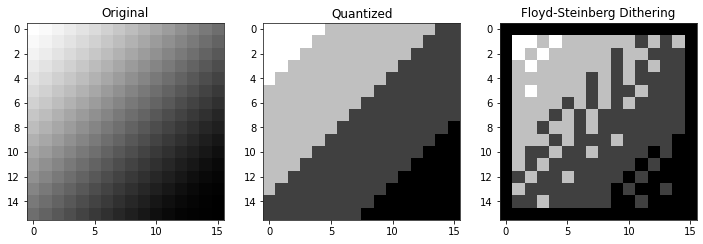

In [300]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.subplot(131), plt.imshow(testImg), plt.title('Original')
plt.subplot(132), plt.imshow(quantize(testImg, colors)), plt.title('Quantized')
plt.subplot(133), plt.imshow(fs_dithering(testImg, colors)), plt.title('Floyd-Steinberg Dithering')

<h1>Testing on image</h1>

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

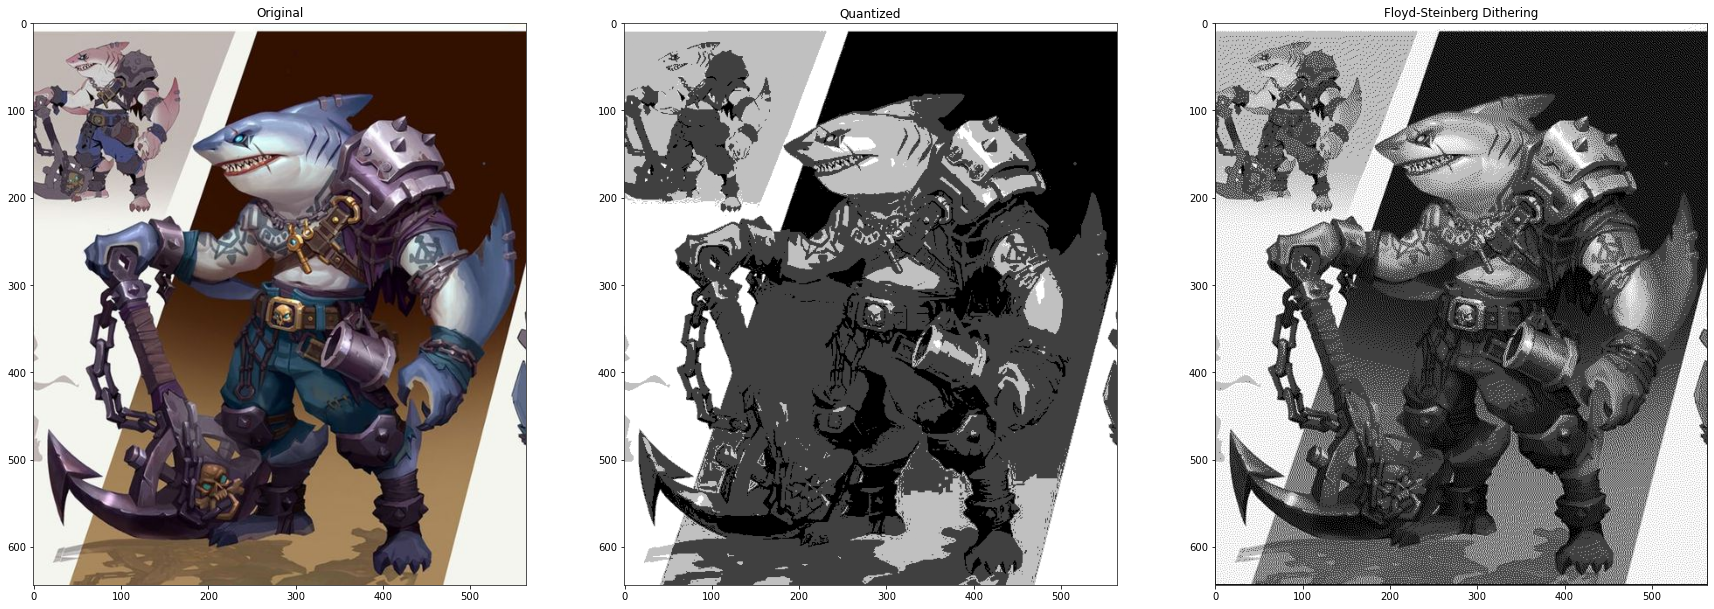

In [301]:
plt.rcParams['figure.figsize'] = [30, 30]
plt.subplot(131), plt.imshow(img), plt.title('Original')
quantized = quantize(img, colors)
plt.subplot(132), plt.imshow(quantized), plt.title('Quantized')
dithered = fs_dithering(img, colors)
plt.subplot(133), plt.imshow(dithered), plt.title('Floyd-Steinberg Dithering')

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

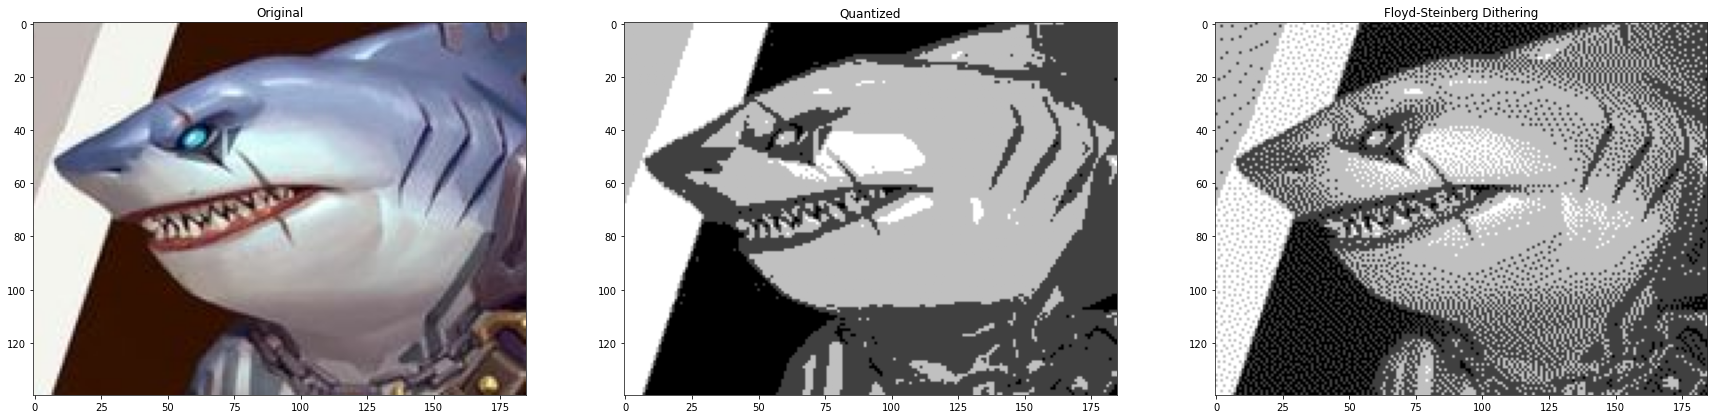

In [302]:
plt.subplot(131), plt.imshow(img[90:230,175:360]), plt.title('Original')
plt.subplot(132), plt.imshow(quantized[90:230,175:360]), plt.title('Quantized')
plt.subplot(133), plt.imshow(dithered[90:230,175:360]), plt.title('Floyd-Steinberg Dithering')

<h1>Questions</h1><br>
<b>1.Which image has higher quantization error? Optimally quantized or dithered?</b><br>
<i>The idea of quantized image is to get image with minimum quantization error. So dithered image has higher quantization error</i><br><br>
<b>2.Which image looks better to you?</b><br>
<i>Dithered image looks better, it makes 'fake' gradient through causing some mess for pixels. But image looks better for human eye because pixels are small</i><br><br>
<b>3.Can you repeat the same process using only two colours: black and white? Show me :-)</b><br>
<i>np</i>

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

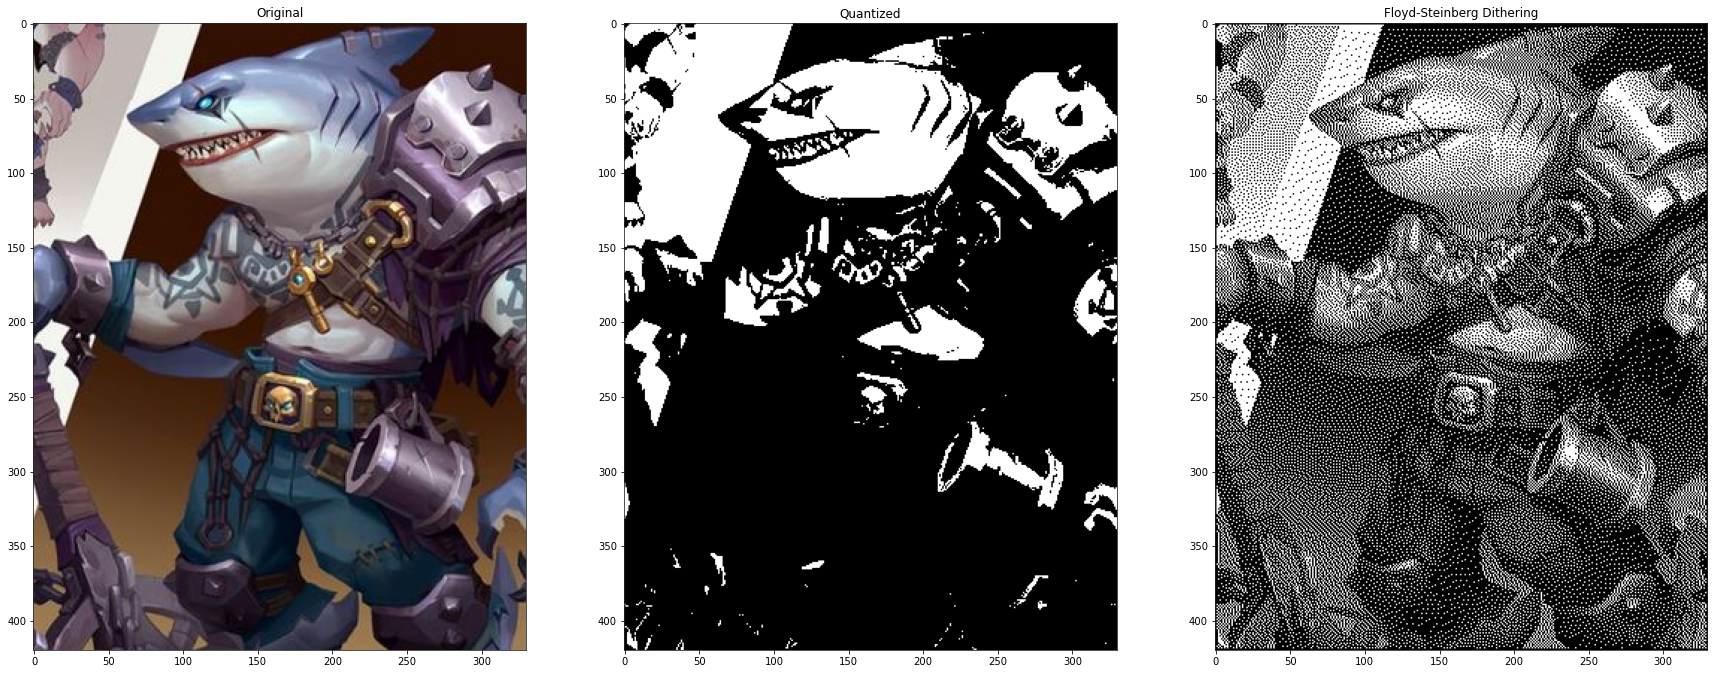

In [312]:
black_white = np.array([[0, 0, 0],[255, 255, 255]])
plt.rcParams['figure.figsize'] = [30, 30]
crop = img[80:500,120:450,:]
plt.subplot(131), plt.imshow(crop), plt.title('Original')
quantized = quantize(crop, black_white)
plt.subplot(132), plt.imshow(quantized), plt.title('Quantized')
dithered = fs_dithering(crop, black_white)
plt.subplot(133), plt.imshow(dithered), plt.title('Floyd-Steinberg Dithering')

<h1>With colors calculated by KMeans</h1>

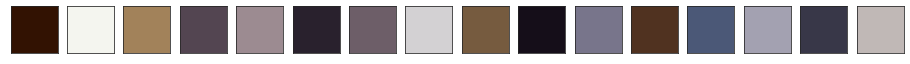

In [319]:
from sklearn.cluster import KMeans
rows, cols, channels = img.shape
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (rows*cols, 3)))
colorsOptimized = kmeans.cluster_centers_
show_colors(colorsOptimized)

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

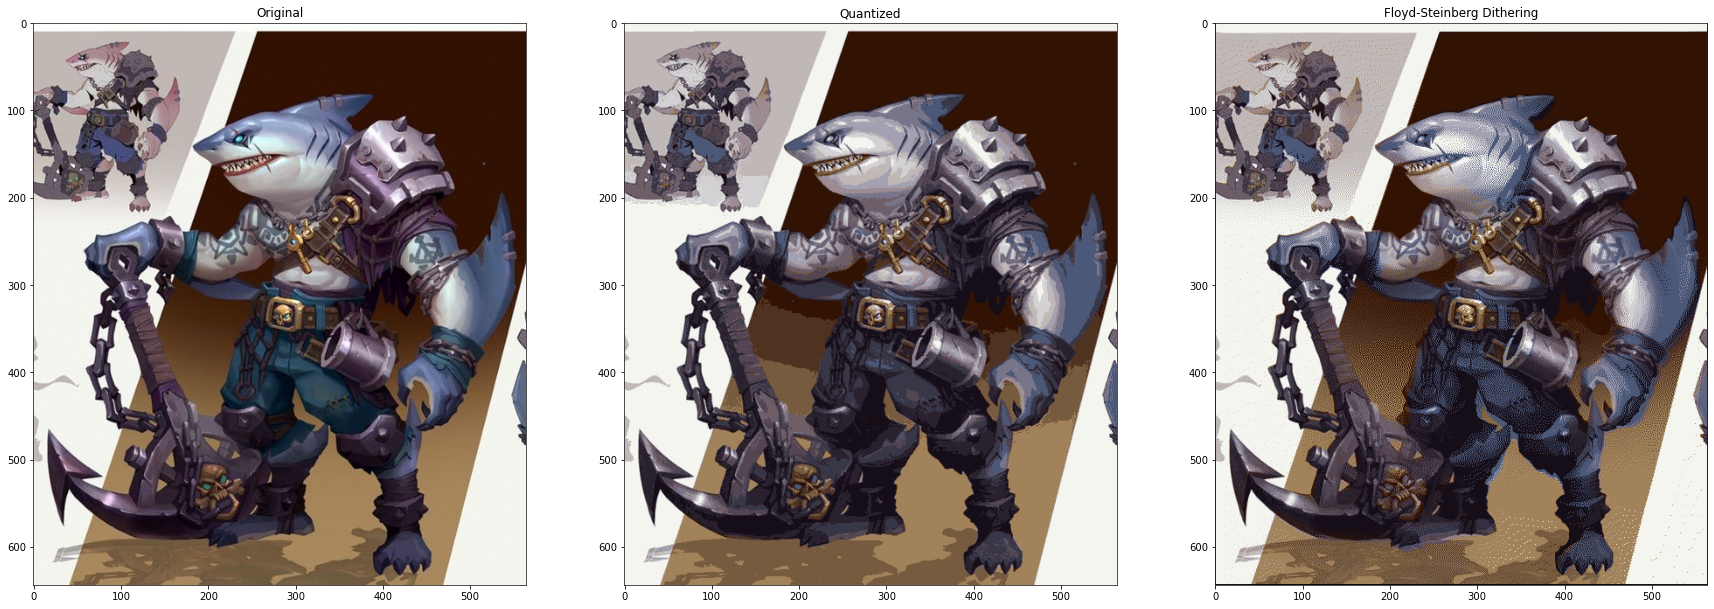

In [320]:
plt.rcParams['figure.figsize'] = [30, 30]
quantized_k = quantized
plt.subplot(131), plt.imshow(img/255), plt.title('Original')
quantized_k = quantize(img, colorsOptimized)
plt.subplot(132), plt.imshow(quantized_k), plt.title('Quantized')
dithered_k = fs_dithering(img, colorsOptimized)
plt.subplot(133), plt.imshow(dithered_k), plt.title('Floyd-Steinberg Dithering')

(<AxesSubplot:title={'center':'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

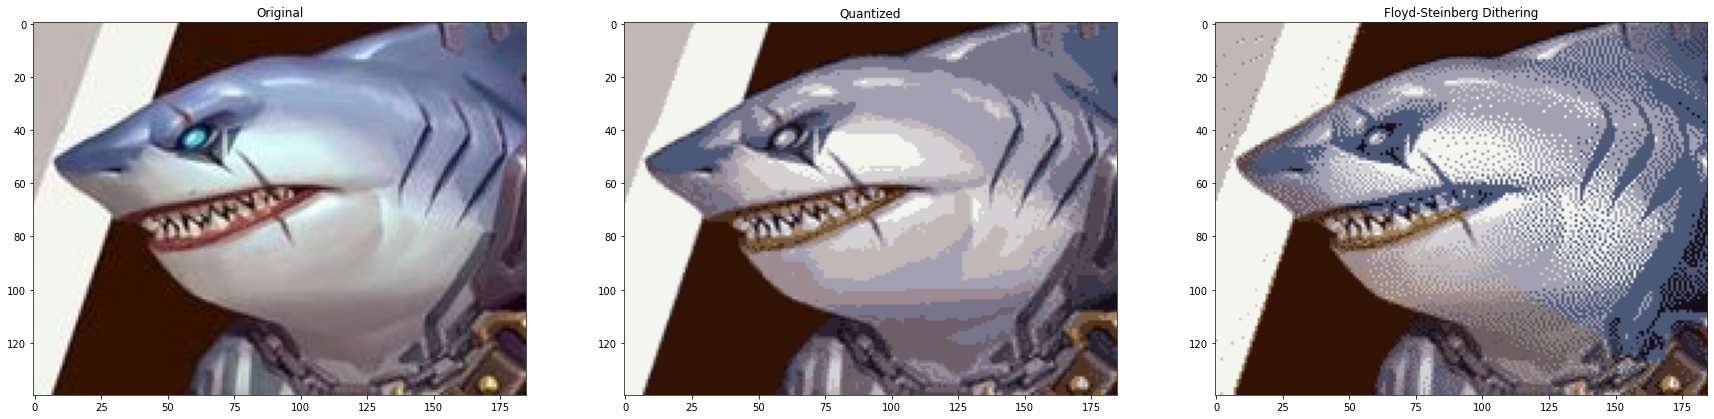

In [321]:
plt.subplot(131), plt.imshow(img[90:230,175:360]), plt.title('Original')
plt.subplot(132), plt.imshow(quantized_k[90:230,175:360]), plt.title('Quantized')
plt.subplot(133), plt.imshow(dithered_k[90:230,175:360]), plt.title('Floyd-Steinberg Dithering')

<h2>Questions</h2>
<b>1. How does the result look like to you?</b><br>
<i>Lack of colors. Some colors that affect small areas have dissapeared totally</i><br><br>
<b>2. What happens if we use 32 colours?</b><br>
<i>Result looks much better. But I still don't see the color of the eye, some colors are not saturated enough</i><br><br>
<b>3. And what happens if we use 256 colours?</b><br>
<i>I had some time to make a tea. But image looks fine even without dithering. Dithering making it a bit noisy in this case</i>

<h2>Thanks for viewing!</h2> ❤️️